In [1]:
import torch 
import numpy as np
import torch.nn as nn 
import matplotlib.pyplot as plt 

In [2]:
# create data set with known parameters 
W = 0.7
b = 0.2 

X = torch.arange(0,1,0.02)
y = W * X + b

In [3]:
# train/test split 
r = int(0.8*len(X))
X_train, y_train = X[:r],y[:r]
X_test,y_test = X[r:],y[r:]

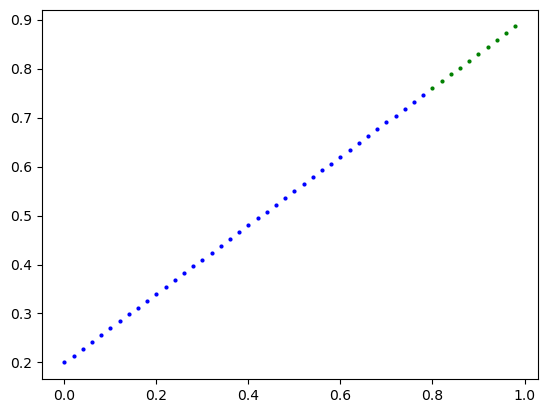

In [4]:
# plot train and test data 
plt.scatter(X_train,y_train,s=4,c='b')
plt.scatter(X_test,y_test,s=4,c='g')

In [5]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
        
    def forward(self,x):
        return self.weights * x + self.bias

In [6]:
torch.manual_seed(42)
model_0 = LinearRegression()
# print the model parameters and their values 
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [7]:
# another way to see model parameters and values 
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [8]:
# make predictions using the model
with torch.inference_mode():
    y_pred = model_0(X_test)

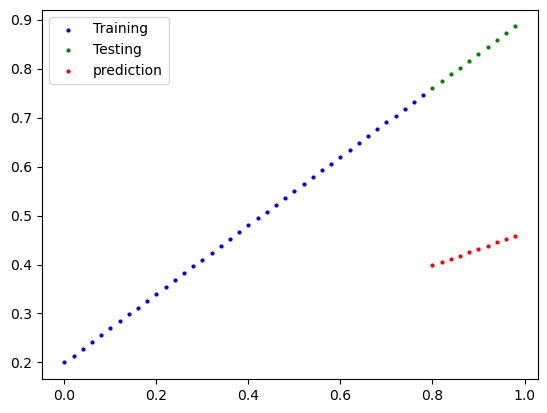

In [9]:
# plot train, val and test data values 
plt.scatter(X_train,y_train,s=4,c='b',label="Training")
plt.scatter(X_test,y_test,s=4,c='g',label="Testing")
plt.scatter(X_test,y_pred,s=4,c='r',label="prediction")
plt.legend()

In [10]:
# train the model 

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)

epochs = 100
epoch_count = []
train_loss_values = []
test_loss_values = []

for epoch in range(epochs):
    # training 
    model_0.train()
    y_pred = model_0(X_train)
    loss = loss_fn(y_pred,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # testing 
    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred,y_test)
    
    # print losses 
    if epoch % 10 ==0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f'Epoch: {epoch} | MAE train loss: {loss:.4f} | MAE Test loss : {test_loss:.4f}')

Epoch: 0 | MAE train loss: 0.2129 | MAE Test loss : 0.3811
Epoch: 10 | MAE train loss: 0.1035 | MAE Test loss : 0.2515
Epoch: 20 | MAE train loss: 0.0628 | MAE Test loss : 0.1728
Epoch: 30 | MAE train loss: 0.0529 | MAE Test loss : 0.1360
Epoch: 40 | MAE train loss: 0.0487 | MAE Test loss : 0.1175
Epoch: 50 | MAE train loss: 0.0452 | MAE Test loss : 0.1065
Epoch: 60 | MAE train loss: 0.0417 | MAE Test loss : 0.0968
Epoch: 70 | MAE train loss: 0.0383 | MAE Test loss : 0.0886
Epoch: 80 | MAE train loss: 0.0348 | MAE Test loss : 0.0810
Epoch: 90 | MAE train loss: 0.0314 | MAE Test loss : 0.0727


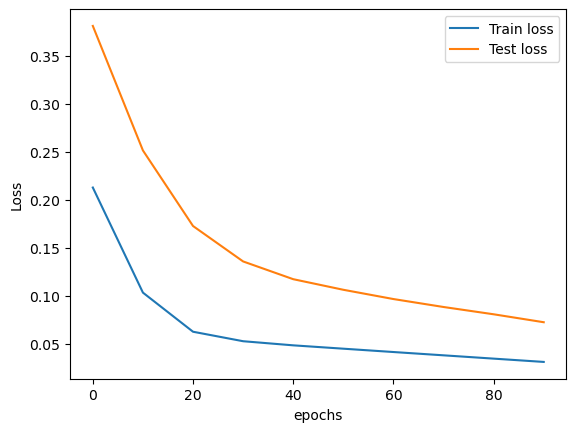

In [11]:
# plot loss curves 
plt.plot(epoch_count,train_loss_values,label='Train loss')
plt.plot(epoch_count,test_loss_values,label='Test loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()

In [12]:
# let's see model learned parameters 
model_0.state_dict()

OrderedDict([('weights', tensor([0.5609])), ('bias', tensor([0.2583]))])

In [13]:
# let's see the model predicted values 

model_0.eval()
with torch.inference_mode():
    y_pred = model_0(X_test)
y_pred

tensor([0.7070, 0.7182, 0.7294, 0.7406, 0.7519, 0.7631, 0.7743, 0.7855, 0.7967,
        0.8079])

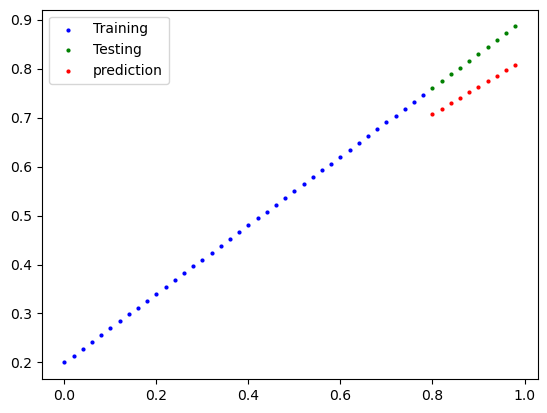

In [14]:
# plot (again) train, test and pred data 

plt.scatter(X_train,y_train,s=4,c='b',label="Training")
plt.scatter(X_test,y_test,s=4,c='g',label="Testing")
plt.scatter(X_test,y_pred,s=4,c='r',label="prediction")
plt.legend()

In [15]:
# we can use nn.Linear() layer to construct the same model (this is convenient and efficient)

class LinearRegressionV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,out_features=1)
        
    def forward(self,x):
        return self.linear_layer(x)
    
torch.manual_seed(42)
model_1 = LinearRegressionV2()
model_1.state_dict()


OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])